# **Lab7 - 24 Oct 2024**

## **202201260 - Dishant Patel**

### **Analyzing and Preprocessing the data for the Training of the Model**

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv("https://raw.githubusercontent.com/pdishant5/IT-462-Exploratory-Data-Analysis-Assignments/refs/heads/main/LabAssignment6/Loan_train.csv")

In [91]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [92]:
# Looking for the unique values and their counts of the target variable "loan_status"
df['loan_status'].value_counts()

,count
loan_status,
0,50295
1,8350


In [93]:
# Get the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [94]:
# Summary statistics for numerical columns
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [95]:
df['loan_grade'].unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object)

In [96]:
# Check for missing values
df.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [97]:
# Separating the numerical and categorical variables
df_numeric_list= ['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']
df_cat_list = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Separating the numerical and categorical dataframes
df_numeric = df[df_numeric_list]
df_cat = df[df_cat_list]

{'whiskers': [<matplotlib.lines.Line2D at 0x7d90c9f85660>,
 'caps': [<matplotlib.lines.Line2D at 0x7d90c9f85ba0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d90c9f853c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d90c9f85fc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d90c9f86260>],
 'means': []}

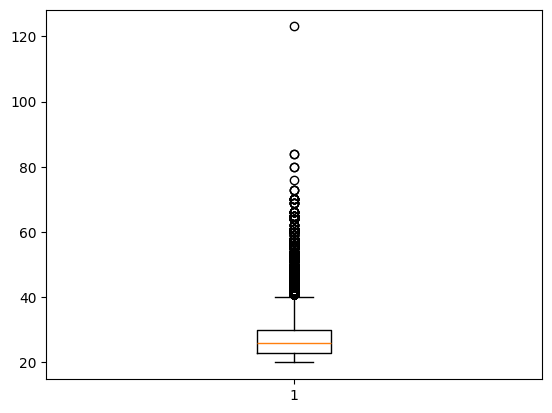

In [98]:
# Checking for any outliers in the "person_age" variable
plt.boxplot(df_numeric['person_age'])

In [99]:
df_loanstatus = df_numeric['loan_status']
df_numeric.drop('loan_status', axis=1, inplace=True)

<ipython-input-99-c9294cd66250>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.drop('loan_status', axis=1, inplace=True)


In [100]:
# Create a copy of the original DataFrame to work on
df_no_outliers = df_numeric.copy()

# Loop through each column in the DataFrame
for column in df_no_outliers.columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define outlier criteria (1.5 times the IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    df_no_outliers = df_no_outliers[~((df_no_outliers[column] <= lower_bound) | (df_no_outliers[column] >= upper_bound))]

# Display the resulting DataFrame shape and confirm no values are outside bounds
print("Shape after capping outliers:", df_no_outliers.shape)

Shape after capping outliers: (48153, 8)


In [101]:
# Create a copy of the original DataFrame to work on
df_cleaned = df_numeric.copy()

# Loop through each column in the DataFrame
for column in df_cleaned.columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define outlier criteria (1.5 times the IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values outside the bounds using clip
    df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound, upper=upper_bound)

# Display the resulting DataFrame shape and confirm no values are outside bounds
print("Shape after capping outliers:", df_cleaned.shape)

Shape after capping outliers: (58645, 8)


In [102]:
# Separating the nominal and ordinal variables
df_cat_nominal_list = ['person_home_ownership', 'loan_intent' , 'cb_person_default_on_file']
df_cat_ordinal_list = ['loan_grade']

# Separating the nominal and ordinal dataframes
df_cat_nominal= df[df_cat_nominal_list]
df_cat_ordinal= df[df_cat_ordinal_list]

In [103]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Make a copy of the DataFrame to avoid the warning
df_cat_nominal_encoded = df_cat_nominal.copy()

# Apply label encoding to each column
for column in df_cat_nominal_encoded.columns:
    df_cat_nominal_encoded[column] = label_encoder.fit_transform(df_cat_nominal_encoded[column])

# Display the first few rows of the encoded DataFrame
df_cat_nominal_encoded.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
0,3,1,0
1,2,3,0
2,2,4,0
3,3,5,0
4,3,3,0


In [104]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order for ordinal data
loan_grade_order = [['A', 'B', 'C', 'D', 'E', 'F', 'G']]

# Create an OrdinalEncoder instance with the specified order
ordinal_encoder = OrdinalEncoder(categories=loan_grade_order)

# Apply ordinal encoding to the df_cat_ordinal DataFrame
df_cat_ordinal_encoded = df_cat_ordinal.copy()  # Make a copy to avoid modifying the original
df_cat_ordinal_encoded['loan_grade'] = ordinal_encoder.fit_transform(df_cat_ordinal[['loan_grade']])

# Display the first few rows of the encoded DataFrame
df_cat_ordinal_encoded.head()

,loan_grade
0,1.0
1,2.0
2,0.0
3,1.0
4,0.0


In [105]:
# Concatenate df_cat_ordinal_encoded and df_cat_nominal_encoded along columns
df_cat_encoded = pd.concat([df_cat_ordinal_encoded, df_cat_nominal_encoded], axis=1)

# Display the first few rows of the combined DataFrame
df_cat_encoded.head()

,loan_grade,person_home_ownership,loan_intent,cb_person_default_on_file
0,1.0,3,1,0
1,2.0,2,3,0
2,0.0,2,4,0
3,1.0,3,5,0
4,0.0,3,3,0


In [106]:
# Combine the cleaned numeric DataFrame with the encoded categorical DataFrame
df_final = pd.concat([df_cleaned.reset_index(drop=True),
                      df_cat_encoded.reset_index(drop=True),
                      df_loanstatus.reset_index(drop=True)], axis=1)

df_final.head()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,person_home_ownership,loan_intent,cb_person_default_on_file,loan_status
0,0,37.0,35000,0.0,6000,11.49,0.17,14.0,1.0,3,1,0,0
1,1,22.0,56000,6.0,4000,13.35,0.07,2.0,2.0,2,3,0,0
2,2,29.0,28800,8.0,6000,8.90,0.21,10.0,0.0,2,4,0,0
3,3,30.0,70000,14.0,12000,11.11,0.17,5.0,1.0,3,5,0,0
4,4,22.0,60000,2.0,6000,6.92,0.10,3.0,0.0,3,3,0,0


In [107]:
df_final.shape

(58645, 13)

In [108]:
df_final.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_emp_length,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_cred_hist_length,0
loan_grade,0
person_home_ownership,0


<Axes: >

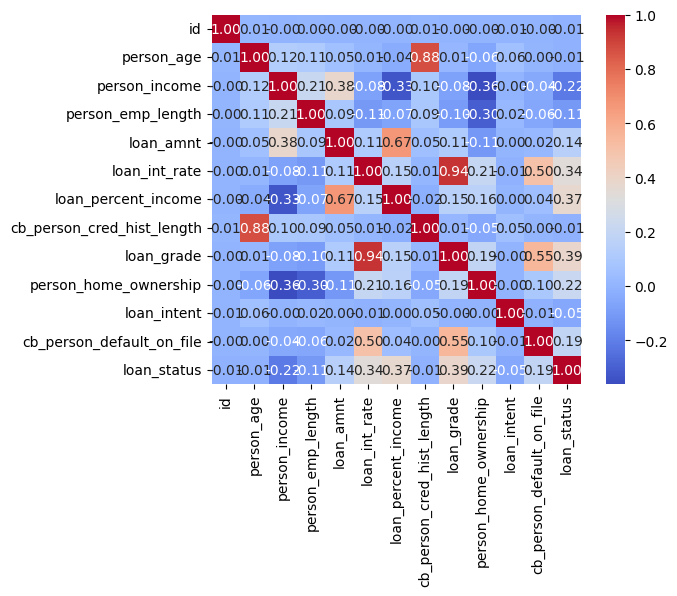

In [109]:
# Calculate the correlation matrix
correlation_matrix = df_final.corr()

# Display the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)

### **Training & Testing of the Model: Method 1 & Method 2**

In [110]:
from sklearn.feature_selection import SelectKBest, f_regression

ids = df['id']
X = df_final.drop(columns=['loan_status'])  # Features
y = df_final['loan_status']  # Target variable

# Select the top K features
selector = SelectKBest(score_func=f_regression, k=5)
X_selected_kbest = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()].tolist()
print("Selected Features:", selected_features)

Selected Features: ['person_income', 'loan_int_rate', 'loan_percent_income', 'loan_grade', 'person_home_ownership']


In [111]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest model
rf_model = RandomForestRegressor()

# Fit the model
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top K features
top_features = feature_importance_df.head(5)
print("Top Features based on Feature Importance:\n", top_features)
X_selected_forest = X[top_features['Feature']]

Top Features based on Feature Importance:
                   Feature  Importance
6     loan_percent_income    0.250806
8              loan_grade    0.180096
9   person_home_ownership    0.130189
10            loan_intent    0.083704
2           person_income    0.079151


In [112]:
from sklearn.preprocessing import StandardScaler

# Transformation of X_selected computed using SelectKBest
scaler = StandardScaler()
X_scaled_kbest = scaler.fit_transform(X_selected_kbest)

# Transformation of X_selected computed using RandomForestRegressor
scaler = StandardScaler()
X_scaled_forest = scaler.fit_transform(X_selected_forest)

In [113]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Model fitting for X_scaled_kbest
# Train-Test Split
X_train_k, X_test_k, y_train_k, y_test_k, id_train_k, id_test_k = train_test_split(X_scaled_kbest, y, ids, test_size=0.2, random_state=42)

# Model fitting for X_scaled_forest
# Train-Test Split
X_train_f, X_test_f, y_train_f, y_test_f, id_train_f, id_test_f = train_test_split(X_scaled_forest, y, ids, test_size=0.2, random_state=42)

# Model: XG Boost for both Kbest and RandomForest
model1 = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)
model2 = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)

# Fit the Model for kbest
model1.fit(X_train_k, y_train_k)

# Fit the Model for RandomForest
model2.fit(X_train_f, y_train_f)

# Make Predictions for kbest
y_pred_k = model1.predict(X_test_k)  # Predicted classes
y_pred_proba_k = model1.predict_proba(X_test_k)[:, 1]  # Predicted probabilities for the positive class

# Make Predictions for RandomForest
y_pred_f = model2.predict(X_test_f)  # Predicted classes
y_pred_proba_f = model2.predict_proba(X_test_f)[:, 1]  # Predicted probabilities for the positive class


# Evaluate the Model for kbest
accuracy_k = accuracy_score(y_test_k, y_pred_k)
roc_auc_k = roc_auc_score(y_test_k, y_pred_proba_k)

print("Evaluation metrics for KBest")
print("Accuracy:", accuracy_k)
print("ROC AUC Score:", roc_auc_k)


# Evaluate the Model for RandomForest
accuracy_f = accuracy_score(y_test_f, y_pred_f)
roc_auc_f = roc_auc_score(y_test_f, y_pred_proba_f)

print("\nEvaluation metrics for RandomForest")
print("Accuracy:", accuracy_f)
print("ROC AUC Score:", roc_auc_f)

Evaluation metrics for KBest
Accuracy: 0.9382726575155598
ROC AUC Score: 0.9450838605472222

Evaluation metrics for RandomForest
Accuracy: 0.949356296359451
ROC AUC Score: 0.953689201148546


In [114]:
# For KBest model
results_k = pd.DataFrame({
    'ID': id_test_k,
    'Predicted Loan Status': y_pred_k,
})
print("Results for KBest model:\n", results_k.head(10))

Results for KBest model:
           ID  Predicted Loan Status
4657    4657                      0
56440  56440                      0
42117  42117                      0
10849  10849                      0
39395  39395                      0
17557  17557                      1
906      906                      0
43624  43624                      0
29017  29017                      0
32662  32662                      0


In [115]:
# For RandomForest model
results_f = pd.DataFrame({
    'ID': id_test_f,
    'Predicted Loan Status': y_pred_f,
})
print("Results for RandomForest model:\n", results_f.head(10))

Results for RandomForest model:
           ID  Predicted Loan Status
4657    4657                      0
56440  56440                      0
42117  42117                      0
10849  10849                      0
39395  39395                      0
17557  17557                      1
906      906                      0
43624  43624                      0
29017  29017                      0
32662  32662                      0


In [116]:
# Storing the predected values for the target variables in the .csv file
results_f.to_csv("202201260_model_predictions.csv", index=False)